In [1]:
%%writefile Altitude.txt
BP Pressure
194.5   20.79
194.3   20.79
197.9   22.40
198.4   22.67
199.4   23.15
199.9   23.35
200.9   23.89
201.1   23.99
201.4   24.02
201.3   24.01
203.6   25.14
204.6   26.57
209.5   28.49
208.6   27.76
210.7   29.04
211.9   29.88
212.2   30.06

Overwriting Altitude.txt


In [2]:
#Loading Data
import pandas as pd
import os
data = pd.read_csv('Altitude.txt',delimiter=r"\s+")

In [9]:
# Linear Regression 
import numpy as np
import statsmodels.formula.api as smf
linear = smf.ols('data.BP~data.Pressure',data = data).fit()
print(linear.summary())
print('\n Coefficients: \n', linear.params)
print('The coefficient (155.296483) is significant because its p-value (0.000) < 0.001')

                            OLS Regression Results                            
Dep. Variable:                data.BP   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2677.
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           2.53e-18
Time:                        10:34:34   Log-Likelihood:                -9.2564
No. Observations:                  17   AIC:                             22.51
Df Residuals:                      15   BIC:                             24.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       155.2965      0.927    167.465

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [10]:
# Quadratic Regression
quadratic = smf.ols('data.BP ~ data.Pressure + I(data.Pressure ** 2)', data = data).fit()
print(quadratic.summary())
print('\n Coefficients: \n', quadratic.params)
print('The significant coefficients are (140.827262 and 3.047593 ) because their p-values (0.000, 0.001) < 0.001')
print('The coefficient (-0.022377) is insignificant because its p-value () > 0.05')

                            OLS Regression Results                            
Dep. Variable:                data.BP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1494.
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           4.80e-17
Time:                        10:34:35   Log-Likelihood:                -7.7442
No. Observations:                  17   AIC:                             21.49
Df Residuals:                      14   BIC:                             23.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept               140.82

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


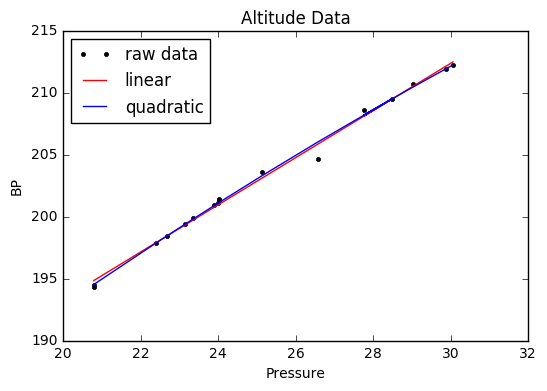

In [8]:
# Graph
import matplotlib.pyplot as plt
plt.plot(data.Pressure, data.BP ,'k.',label='raw data')
plt.plot(data.Pressure, linear.fittedvalues, 'r-', label = 'linear')
plt.plot(data.Pressure, quadratic.fittedvalues, 'b-', label = 'quadratic')
plt.xlabel('Pressure')
plt.ylabel('BP')
plt.title('Altitude Data')
plt.legend(loc =2)
plt.show()